In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import statsmodels.stats.api as sms
from scipy import stats
import seaborn as sns

In [2]:
df = pd.read_csv('base6.csv', low_memory=False)

In [3]:
pd.set_option('display.max_columns', None)
display(df)

,Age,Ethnicity,Gender,Confirmed date,Method of confirmation,Hospital admission date,Hospital admission,Icu admission date,Icu Admission,Date of onset of symptoms,Outcome date,Outcome values,State,District,Pre-existing conditions,List of pre-existing conditions,Symptom status,Symptpms,Age Range,Internment days,Condition1,Condition2,Condition3,Condition4,Condition5,Condition6,Condition7,Condition8,Condition9,Condition10,Condition11,Condition12,Condition13,Symptom_Hospitalization_Interval,Hospitalization_Interval
0,68,Unknown,Female,2020-03-30,PCR test,2020-03-30,Yes,NaN,No,2020-03-29,2020-04-06,Recovered,São Paulo,São Paulo,True,"heart disease,asthma,other comorbidity listed ...",Symptomatic,"dyspnea,fever,cough,hypoxemia,diarrhoea,vomiting",65-69,7.0,heart disease,asthma,has,hipotireoidismo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,7
1,68,White,Male,2020-04-01,PCR test,2020-04-01,Yes,NaN,No,2020-03-26,2020-04-15,Death,São Paulo,São Paulo,True,asthma,Symptomatic,"dyspnea,fever,cough",65-69,14.0,asthma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,14
2,48,White,Male,2020-04-02,PCR test,2020-04-02,Yes,NaN,No,2020-04-01,2020-04-03,Recovered,São Paulo,São Paulo,True,heart disease,Symptomatic,"throat pain,dyspnea,fever,cough",45-49,1.0,heart disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
3,63,White,Male,2020-04-04,PCR test,2020-04-04,Yes,NaN,No,2020-03-23,2020-04-10,Recovered,São Paulo,São Paulo,True,heart disease,Symptomatic,"dyspnea,fever,cough,hypoxemia",60-64,6.0,heart disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,6
4,83,Mixed,Female,2020-04-04,PCR test,2020-04-04,Yes,2020-04-21,Yes,2020-04-04,2020-04-21,Death,São Paulo,Franco da Rocha,True,heart disease,Symptomatic,"dyspnea,fever,cough,hypoxemia",80-84,17.0,heart disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878584,63,Mixed,Female,2021-12-19,PCR test,2021-12-18,Yes,NaN,No,2021-12-17,2021-12-31,Recovered,Paraíba,Santa Rita,True,other comorbidity listed as: HAS,Symptomatic,dyspnea,60-64,13.0,has,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,13
878585,63,White,Male,2021-11-28,Unknow,2021-11-28,Yes,NaN,No,2021-11-27,2021-12-07,Recovered,Rio Grande do Sul,Canoas,True,heart disease,Symptomatic,"dyspnea,cough,abdominal discomfort",60-64,9.0,heart disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,9
878586,33,White,Male,2021-12-17,PCR test,2021-12-17,Yes,2022-01-06,Yes,2021-12-07,2022-01-06,Death,Rio Grande do Sul,Novo Hamburgo,True,obesity,Symptomatic,"throat pain,dyspnea,fever,cough,hypoxemia,fatigue",30-34,20.0,obesity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,20
878587,53,White,Male,2021-05-29,PCR test,2021-05-29,Yes,NaN,No,2021-05-24,2021-06-06,Death,São Paulo,Ariranha,True,diabetes mellitus,Symptomatic,"dyspnea,hypoxemia",50-54,8.0,diabetes mellitus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,8


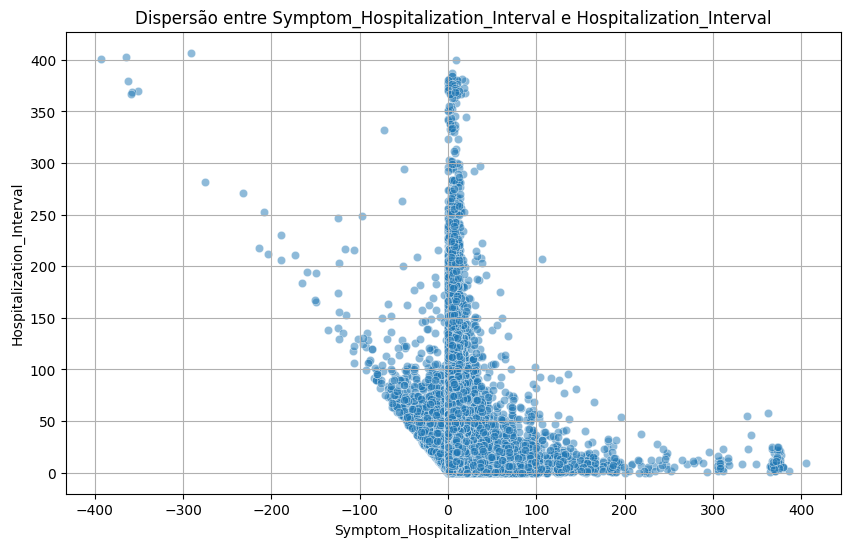

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Symptom_Hospitalization_Interval', y='Hospitalization_Interval', alpha=0.5)
plt.title('Dispersão entre Symptom_Hospitalization_Interval e Hospitalization_Interval')
plt.xlabel('Symptom_Hospitalization_Interval')
plt.ylabel('Hospitalization_Interval')
plt.grid(True)
plt.show()

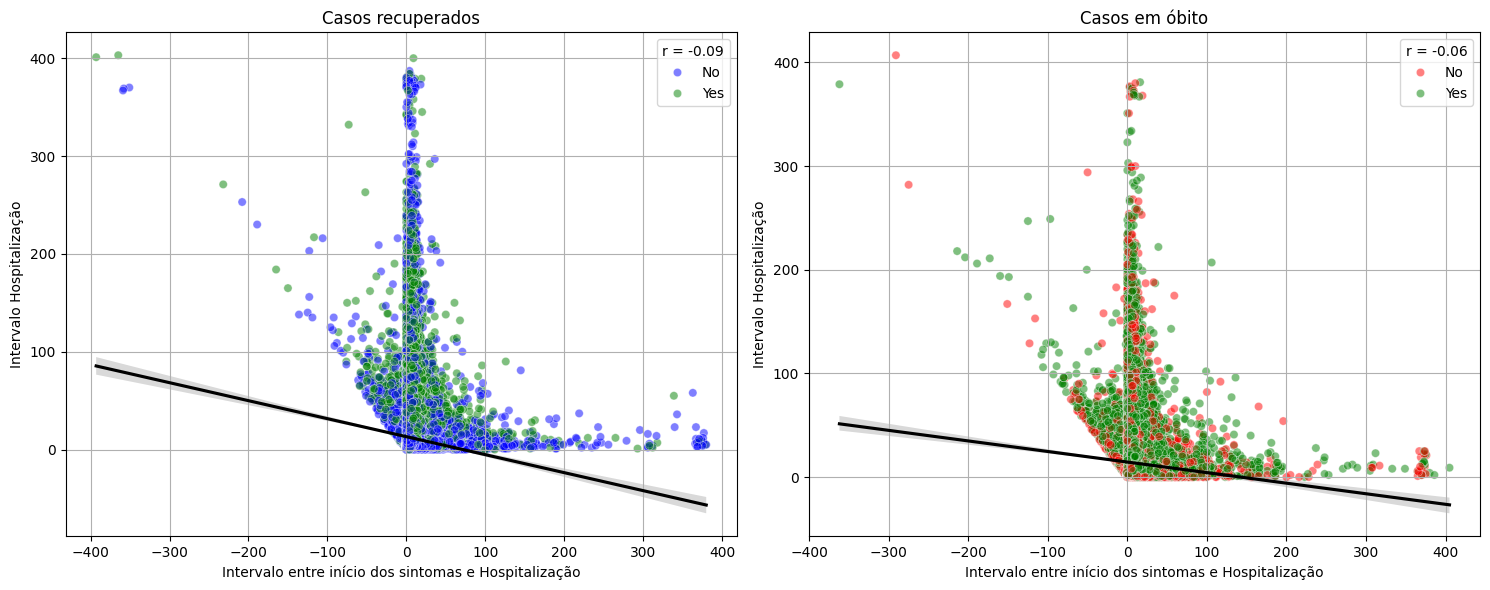

In [12]:
# Filtrar os dados para 'Recovered' e 'Death'
recovered = df[df['Outcome values'] == 'Recovered']
death = df[df['Outcome values'] == 'Death']

# Calcular o coeficiente de correlação de Pearson para cada subconjunto
pearson_corr_recovered, _ = pearsonr(recovered['Symptom_Hospitalization_Interval'], recovered['Hospitalization_Interval'])
pearson_corr_death, _ = pearsonr(death['Symptom_Hospitalization_Interval'], death['Hospitalization_Interval'])

# Criar figura e eixos para os subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Gráfico para casos "Recovered"
sns.scatterplot(data=recovered, x='Symptom_Hospitalization_Interval', y='Hospitalization_Interval', hue='Icu Admission', palette={'Yes': 'green', 'No': 'blue'}, alpha=0.5, ax=ax1)
sns.regplot(data=recovered, x='Symptom_Hospitalization_Interval', y='Hospitalization_Interval', scatter=False, color='black', ax=ax1)
ax1.set_title('Casos recuperados')
ax1.set_xlabel('Intervalo entre início dos sintomas e Hospitalização')
ax1.set_ylabel('Intervalo Hospitalização')
ax1.grid(True)
ax1.legend(title=f'r = {pearson_corr_recovered:.2f}', loc='upper right')

# Gráfico para casos "Death"
sns.scatterplot(data=death, x='Symptom_Hospitalization_Interval', y='Hospitalization_Interval', hue='Icu Admission', palette={'Yes': 'green', 'No': 'red'}, alpha=0.5, ax=ax2)
sns.regplot(data=death, x='Symptom_Hospitalization_Interval', y='Hospitalization_Interval', scatter=False, color='black', ax=ax2)
ax2.set_title('Casos em óbito')
ax2.set_xlabel('Intervalo entre início dos sintomas e Hospitalização')
ax2.set_ylabel('Intervalo Hospitalização')
ax2.grid(True)
ax2.legend(title=f'r = {pearson_corr_death:.2f}', loc='upper right')

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.show()


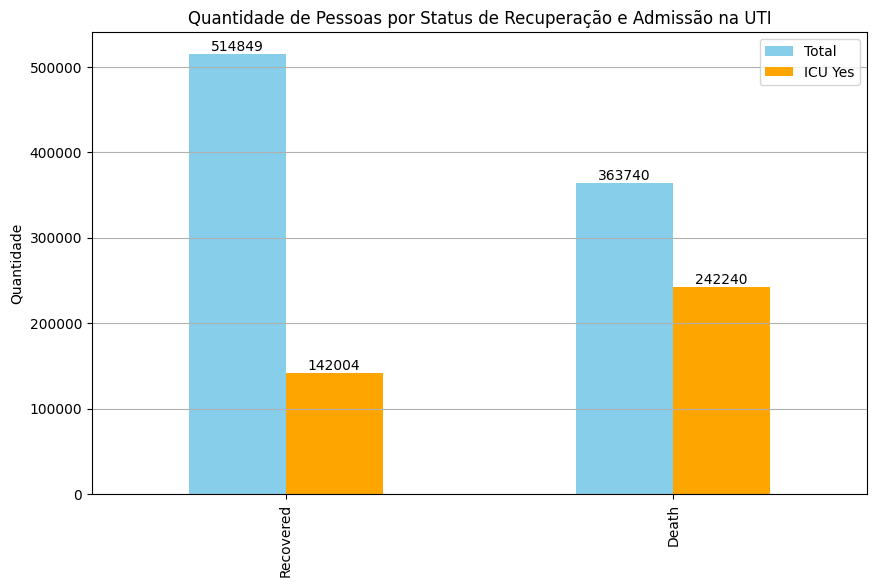

In [14]:
# Calcular a quantidade total de 'Recovered' e 'Death'
total_counts = df['Outcome values'].value_counts()

# Calcular a quantidade de 'Recovered' e 'Death' que têm 'Yes' na coluna 'Icu Admission'
icu_counts = df[df['Icu Admission'] == 'Yes']['Outcome values'].value_counts()

# Criar DataFrame com os resultados
data = {
    'Total': [total_counts.get('Recovered', 0), total_counts.get('Death', 0)],
    'ICU Yes': [icu_counts.get('Recovered', 0), icu_counts.get('Death', 0)]
}
index = ['Recovered', 'Death']
df_counts = pd.DataFrame(data, index=index)

# Plotar gráfico de barras duplas
fig, ax = plt.subplots(figsize=(10, 6))
df_counts.plot(kind='bar', ax=ax, color=['skyblue', 'orange'])
ax.set_title('Quantidade de Pessoas por Status de Recuperação e Admissão na UTI')
ax.set_xlabel('')
ax.set_ylabel('Quantidade')
ax.grid(axis='y')

# Adicionar os valores das contagens nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.show()


In [4]:
# Converter as colunas para datetime, caso ainda não estejam
'''
df['Date of onset of symptoms'] = pd.to_datetime(df['Date of onset of symptoms'])
df['Hospital admission date'] = pd.to_datetime(df['Hospital admission date'])
df['Outcome date'] = pd.to_datetime(df['Outcome date'])

# Calcular o intervalo entre a data de início dos sintomas e a data de admissão no hospital
df['Symptom_Hospitalization_Interval'] = (df['Hospital admission date'] - df['Date of onset of symptoms']).dt.days

# Calcular o intervalo entre a data de admissão no hospital e a data do desfecho
df['Hospitalization_Interval'] = (df['Outcome date'] - df['Hospital admission date']).dt.days
'''

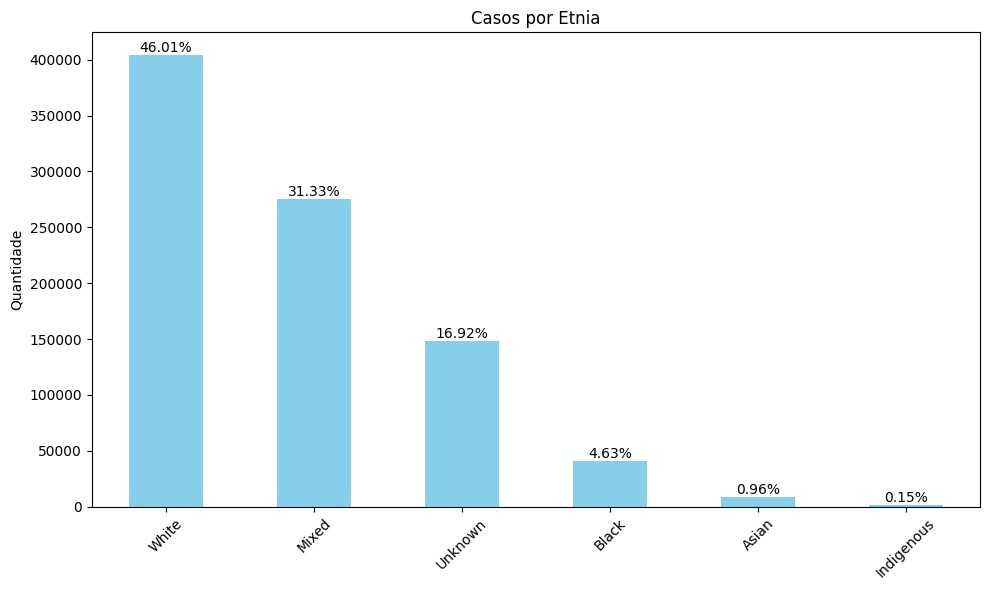

In [4]:
#CASOS POR ETNIA

contagem_etnias = df['Ethnicity'].value_counts()

total_casos = contagem_etnias.sum()

# Calcular a proporção em porcentagem
proporcao_etnias = contagem_etnias / total_casos * 100

# Plotagem do gráfico de barras
plt.figure(figsize=(10, 6))
bars = contagem_etnias.plot(kind='bar', color='skyblue')

# Adicionar a porcentagem acima de cada barra
for i, v in enumerate(contagem_etnias):
    plt.text(i, v + 10, f'{proporcao_etnias.iloc[i]:.2f}%', ha='center', va='bottom', fontsize=10)

plt.title('Casos por Etnia')
plt.xlabel('')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


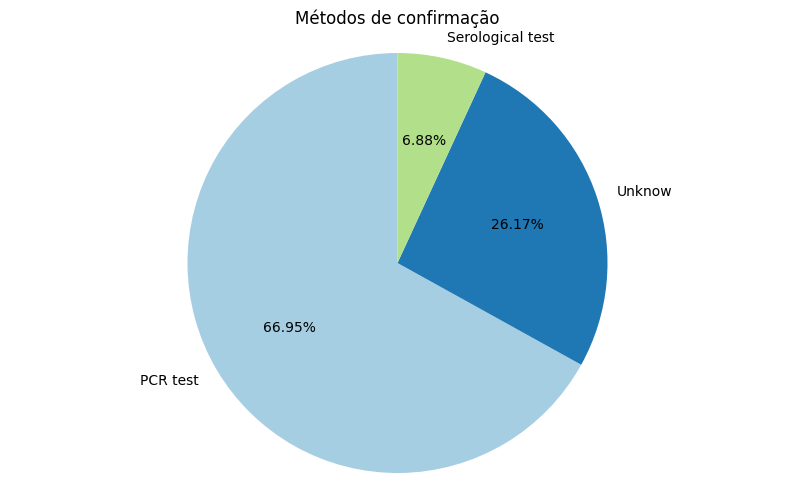

In [23]:
#TIPOS DE TESTE
# Contagem de casos por método de confirmação
contagem_metodos = df['Method of confirmation'].value_counts()

# Ordenar do maior para o menor
contagem_metodos = contagem_metodos.sort_values(ascending=False)

# Plotagem do gráfico de pizza
plt.figure(figsize=(10, 6))
plt.pie(contagem_metodos, labels=contagem_metodos.index, autopct='%1.2f%%', startangle=90, colors=plt.cm.Paired(range(len(contagem_metodos))))
plt.title('Métodos de confirmação')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


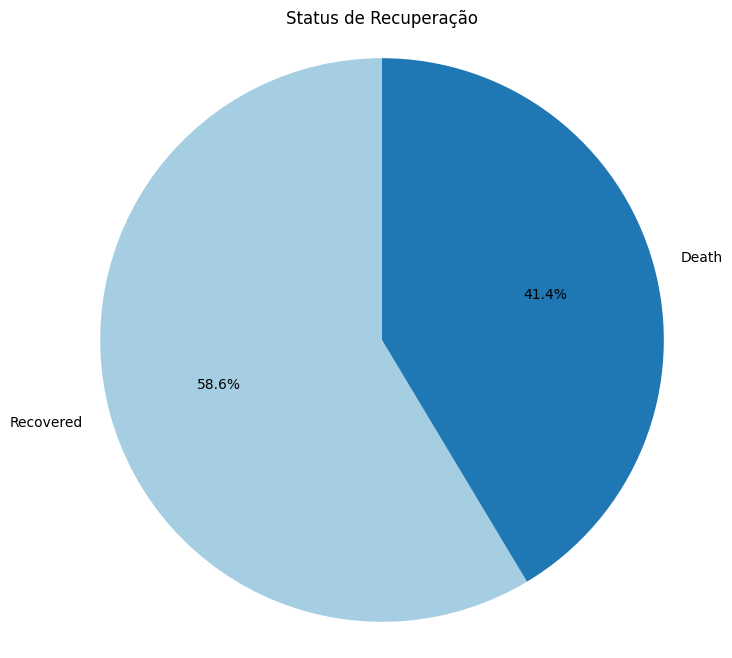

In [22]:
#RECUPERAÇÃO
# Contagem de casos por 'Outcome values'
contagem_outcome = df['Outcome values'].value_counts()

# Ordenar do maior para o menor
contagem_outcome = contagem_outcome.sort_values(ascending=False)

# Definir uma paleta de cores
colors = plt.cm.Paired(range(len(contagem_outcome)))

# Plotagem do gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contagem_outcome, labels=contagem_outcome.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Status de Recuperação')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


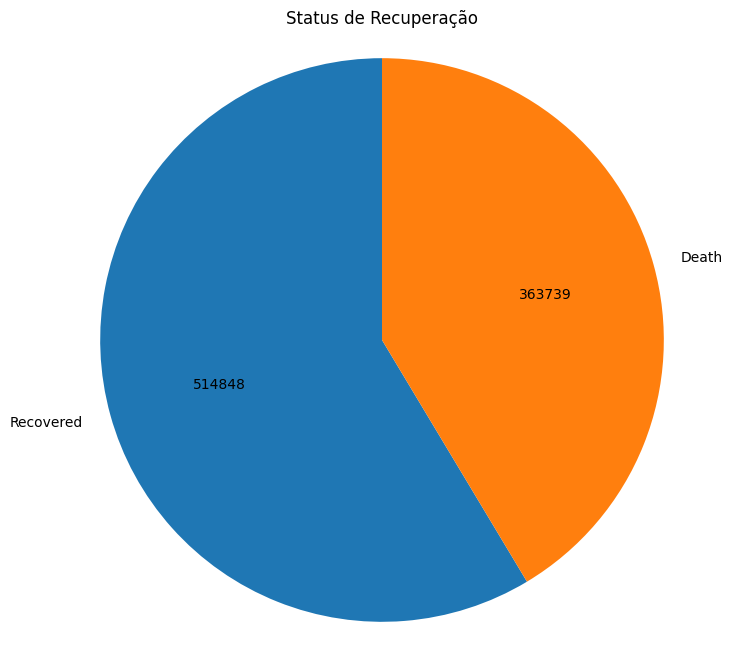

In [72]:
contagem_outcome = df['Outcome values'].value_counts()

# Ordenar do maior para o menor
contagem_outcome = contagem_outcome.sort_values(ascending=False)

# Plotagem do gráfico de pizza com valores absolutos
plt.figure(figsize=(8, 8))
plt.pie(contagem_outcome, labels=contagem_outcome.index, autopct=lambda p: f'{int(p * sum(contagem_outcome)/100)}', startangle=90)
plt.title('Status de Recuperação')
plt.ylabel('')
plt.axis('equal')  # Assegura que o gráfico de pizza seja desenhado como um círculo
plt.show()

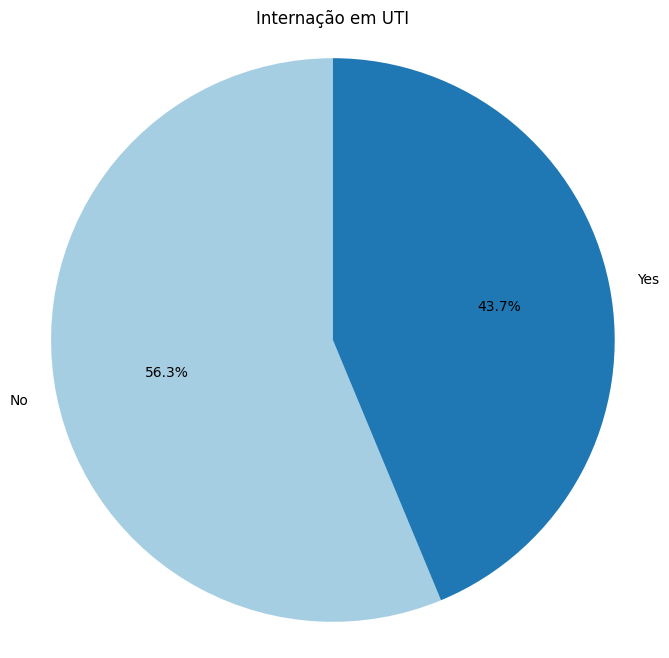

In [25]:
#INTERNAÇÃO EM UTI
# Contagem de casos por 'Icu Admission'
contagem_icu = df['Icu Admission'].value_counts()

# Ordenar do maior para o menor
contagem_icu = contagem_icu.sort_values(ascending=False)

# Definir uma paleta de cores
colors = plt.cm.Paired(range(len(contagem_icu)))

# Plotagem do gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contagem_icu, labels=contagem_icu.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Internação em UTI')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [43]:
df['Symptom_Hospitalization_Interval'].describe()
#df['Hospitalization_Interval'].describe()

count    878589.000000
mean          7.532884
std           7.708985
min        -393.000000
25%           4.000000
50%           7.000000
75%          10.000000
max         405.000000
Name: Symptom_Hospitalization_Interval, dtype: float64

In [5]:

# Filtrar dados para casos "Recovered" e "Death"
recovered = df[df['Outcome values'] == 'Recovered']
death = df[df['Outcome values'] == 'Death']

# Calcular o coeficiente de correlação de Pearson para "Recovered"
pearson_corr_recovered, _ = pearsonr(recovered['Symptom_Hospitalization_Interval'], recovered['Hospitalization_Interval'])
print("Coeficiente de correlação de Pearson para Recovered:", pearson_corr_recovered)

# Calcular o coeficiente de correlação de Pearson para "Death"
pearson_corr_death, _ = pearsonr(death['Symptom_Hospitalization_Interval'], death['Hospitalization_Interval'])
print("Coeficiente de correlação de Pearson para Death:", pearson_corr_death)

# Criar um gráfico de dispersão das duas colunas de intervalo
plt.figure(figsize=(10, 6))

# Plotar pontos para 'Recovered' em azul
plt.scatter(recovered['Symptom_Hospitalization_Interval'], recovered['Hospitalization_Interval'], color='blue', alpha=0.5, label=f'Recovered (r={pearson_corr_recovered:.2f})')

# Ajustar uma linha de regressão para 'Recovered'
model_recovered = LinearRegression()
x_recovered = recovered['Symptom_Hospitalization_Interval'].values.reshape(-1, 1)
y_recovered = recovered['Hospitalization_Interval']
model_recovered.fit(x_recovered, y_recovered)
y_pred_recovered = model_recovered.predict(x_recovered)
plt.plot(recovered['Symptom_Hospitalization_Interval'], y_pred_recovered, color='blue', linewidth=2)

# Plotar pontos para 'Death' em vermelho
plt.scatter(death['Symptom_Hospitalization_Interval'], death['Hospitalization_Interval'], color='red', alpha=0.5, label=f'Death (r={pearson_corr_death:.2f})')

# Ajustar uma linha de regressão para 'Death'
model_death = LinearRegression()
x_death = death['Symptom_Hospitalization_Interval'].values.reshape(-1, 1)
y_death = death['Hospitalization_Interval']
model_death.fit(x_death, y_death)
y_pred_death = model_death.predict(x_death)
plt.plot(death['Symptom_Hospitalization_Interval'], y_pred_death, color='red', linewidth=2)

plt.title('Dispersão entre Symptom_Hospitalization_Interval e Hospitalization_Interval por Outcome values')
plt.xlabel('Symptom_Hospitalization_Interval')
plt.ylabel('Hospitalization_Interval')
plt.grid(True)
plt.legend()  # Mostrar legenda com as categorias
plt.show()


KeyError: 'Symptom_Hospitalization_Interval'

Coeficiente de correlação de Pearson para Recovered: -0.0884649461295062
Coeficiente de correlação de Pearson para Death: -0.05656504521617002


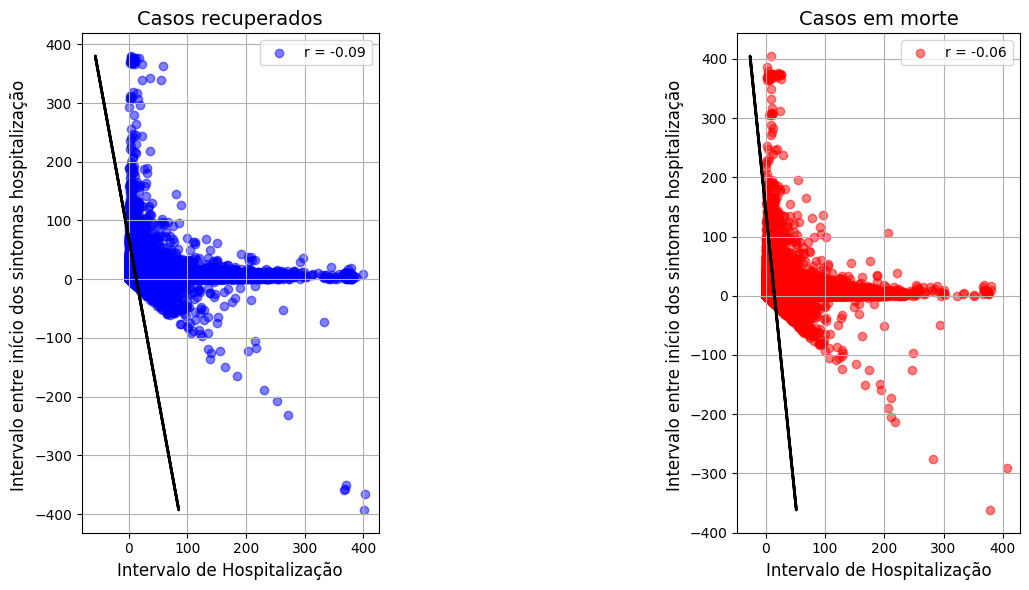

Coeficientes da regressão para Recovered:
Coeficiente angular (slope): -0.18385162847012512
Intercepto: 13.21573728944054

Coeficientes da regressão para Death:
Coeficiente angular (slope): -0.10191287559982334
Intercepto: 14.455523179769452


In [65]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

# Filtrar os dados para 'Recovered' e 'Death'
recovered = df[df['Outcome values'] == 'Recovered']
death = df[df['Outcome values'] == 'Death']

# Criar figura e eixos para os subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Função para traçar a reta de regressão com eixos invertidos
def plot_regression_line(ax, y, x, color, label):
    model = LinearRegression()
    y = y.values.reshape(-1, 1)  # Reshape para o formato necessário do sklearn
    model.fit(y, x)
    x_pred = model.predict(y)
    ax.scatter(x, y, color=color, alpha=0.5, label=label)
    ax.plot(x_pred, y, color='black', linewidth=2)  # Definindo a cor da linha como preta
    ax.set_ylabel('Intervalo entre início dos sintomas hospitalização ', fontsize=12)
    ax.set_xlabel('Intervalo de Hospitalização', fontsize=12)
    ax.grid(True)
    ax.set_aspect('equal', 'box')  # Define a relação de aspecto como igual
    return model

# Calcular o coeficiente de correlação de Pearson para "Recovered"
pearson_corr_recovered, _ = pearsonr(recovered['Hospitalization_Interval'], recovered['Symptom_Hospitalization_Interval'])
print("Coeficiente de correlação de Pearson para Recovered:", pearson_corr_recovered)

# Gráfico para casos "Recovered"
model_recovered = plot_regression_line(ax1, recovered['Symptom_Hospitalization_Interval'], recovered['Hospitalization_Interval'], color='blue', label=f'r = {pearson_corr_recovered:.2f}')
ax1.set_title('Casos recuperados', fontsize=14)
ax1.legend()

# Calcular o coeficiente de correlação de Pearson para "Death"
pearson_corr_death, _ = pearsonr(death['Hospitalization_Interval'], death['Symptom_Hospitalization_Interval'])
print("Coeficiente de correlação de Pearson para Death:", pearson_corr_death)

# Gráfico para casos "Death"
model_death = plot_regression_line(ax2, death['Symptom_Hospitalization_Interval'], death['Hospitalization_Interval'], color='red', label=f'r = {pearson_corr_death:.2f}')
ax2.set_title('Casos em morte', fontsize=14)
ax2.legend()

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.show()

# Exibir coeficientes da regressão
print("Coeficientes da regressão para Recovered:")
print("Coeficiente angular (slope):", model_recovered.coef_[0])
print("Intercepto:", model_recovered.intercept_)

print("\nCoeficientes da regressão para Death:")
print("Coeficiente angular (slope):", model_death.coef_[0])
print("Intercepto:", model_death.intercept_)


Coeficiente de correlação de Pearson para Recovered: -0.07436628244429348
Coeficiente de correlação de Pearson para Death: -0.01716567149074181


C:\Users\rafae\AppData\Local\Temp\ipykernel_1644\3042269564.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\rafae\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


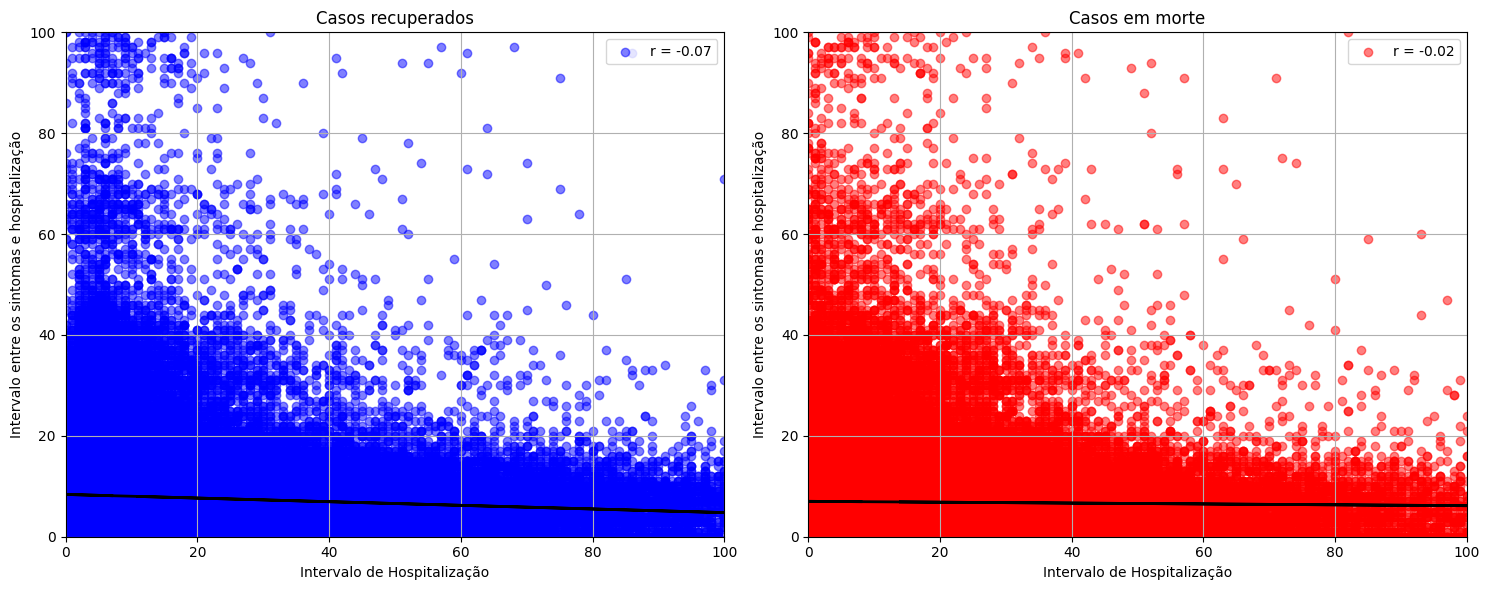

Coeficientes da regressão para Recovered:
Coeficiente angular (slope): -0.03603672173619991
Intercepto: 8.384911966771279

Coeficientes da regressão para Death:
Coeficiente angular (slope): -0.008639152553810332
Intercepto: 7.017306878121041


In [33]:
# Filtrar os dados para 'Recovered' e 'Death' e focar no intervalo de 0 a 100
recovered = df[(df['Outcome values'] == 'Recovered') & 
               (df['Symptom_Hospitalization_Interval'] >= 0) & 
               (df['Symptom_Hospitalization_Interval'] <= 100) &
               (df['Hospitalization_Interval'] >= 0) & 
               (df['Hospitalization_Interval'] <= 100)]
death = df[(df['Outcome values'] == 'Death') & 
           (df['Symptom_Hospitalization_Interval'] >= 0) & 
           (df['Symptom_Hospitalization_Interval'] <= 100) &
           (df['Hospitalization_Interval'] >= 0) & 
           (df['Hospitalization_Interval'] <= 100)]

# Criar figura e eixos para os subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Função para traçar a reta de regressão
def plot_regression_line(ax, x, y, color, label):
    model = LinearRegression()
    x = x.values.reshape(-1, 1)  # Reshape para o formato necessário do sklearn
    model.fit(x, y)
    y_pred = model.predict(x)
    ax.scatter(x, y, color=color, alpha=0.5, label=label)
    ax.plot(x, y_pred, color='black', linewidth=2)  # Definindo a cor da linha como preta
    ax.set_ylim(0, 100)  # Definir limites do eixo y de 0 a 100
    ax.set_xlim(0, 100)  # Definir limites do eixo x de 0 a 100
    ax.set_xlabel('Intervalo de Hospitalização')
    ax.set_ylabel('Intervalo entre os sintomas e hospitalização')
    ax.grid(True)
    return model

# Calcular o coeficiente de correlação de Pearson para "Recovered"
pearson_corr_recovered, _ = pearsonr(recovered['Hospitalization_Interval'], recovered['Symptom_Hospitalization_Interval'])
print("Coeficiente de correlação de Pearson para Recovered:", pearson_corr_recovered)

# Gráfico para casos "Recovered"
model_recovered = plot_regression_line(ax1, recovered['Hospitalization_Interval'], recovered['Symptom_Hospitalization_Interval'], color='blue', label=f'r = {pearson_corr_recovered:.2f}')
ax1.set_title('Casos recuperados')
ax1.legend()

# Calcular o coeficiente de correlação de Pearson para "Death"
pearson_corr_death, _ = pearsonr(death['Hospitalization_Interval'], death['Symptom_Hospitalization_Interval'])
print("Coeficiente de correlação de Pearson para Death:", pearson_corr_death)

# Gráfico para casos "Death"
model_death = plot_regression_line(ax2, death['Hospitalization_Interval'], death['Symptom_Hospitalization_Interval'], color='red', label=f'r = {pearson_corr_death:.2f}')
ax2.set_title('Casos em morte')
ax2.legend()

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.show()

# Exibir coeficientes da regressão
print("Coeficientes da regressão para Recovered:")
print("Coeficiente angular (slope):", model_recovered.coef_[0])
print("Intercepto:", model_recovered.intercept_)

print("\nCoeficientes da regressão para Death:")
print("Coeficiente angular (slope):", model_death.coef_[0])
print("Intercepto:", model_death.intercept_)


Coeficiente de correlação de Pearson para Recovered: -0.03597516296249037
Coeficiente de correlação de Pearson para Death: -0.007526217062969581


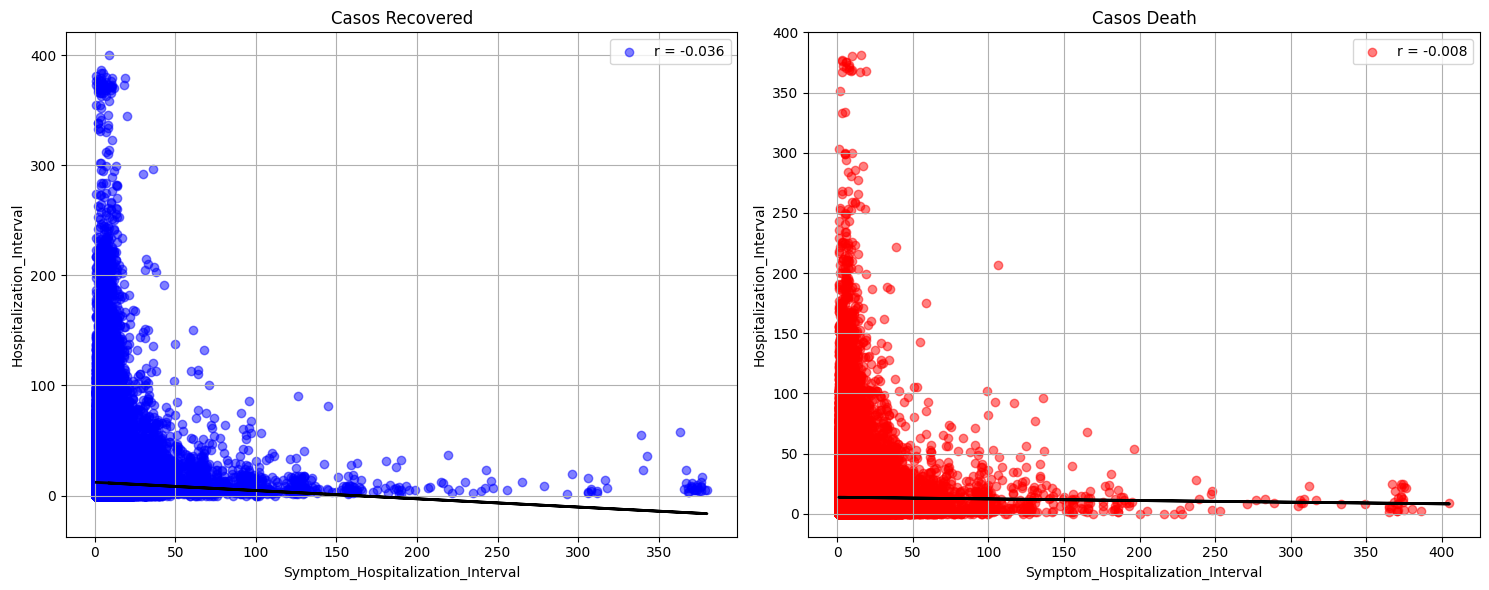

Coeficientes da regressão para Recovered:
Coeficiente angular (slope): -0.07503032097810547
Intercepto: 12.030116124909535

Coeficientes da regressão para Death:
Coeficiente angular (slope): -0.013581580892744872
Intercepto: 13.621853230865774


In [24]:
# Filtrar apenas valores positivos para 'Symptom_Hospitalization_Interval'
recovered = df[(df['Outcome values'] == 'Recovered') & (df['Symptom_Hospitalization_Interval'] > 0)]
death = df[(df['Outcome values'] == 'Death') & (df['Symptom_Hospitalization_Interval'] > 0)]

# Criar figura e eixos para os subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Função para traçar a reta de regressão
def plot_regression_line(ax, x, y, color, label):
    model = LinearRegression()
    x = x.values.reshape(-1, 1)  # Reshape para o formato necessário do sklearn
    model.fit(x, y)
    y_pred = model.predict(x)
    ax.scatter(x, y, color=color, alpha=0.5, label=label)
    ax.plot(x, y_pred, color='black', linewidth=2)  # Definindo a cor da linha como preta
    ax.set_xlabel('Symptom_Hospitalization_Interval')
    ax.set_ylabel('Hospitalization_Interval')
    ax.grid(True)
    return model

# Calcular o coeficiente de correlação de Pearson para "Recovered"
pearson_corr_recovered, _ = pearsonr(recovered['Symptom_Hospitalization_Interval'], recovered['Hospitalization_Interval'])
print("Coeficiente de correlação de Pearson para Recovered:", pearson_corr_recovered)

# Gráfico para casos "Recovered"
model_recovered = plot_regression_line(ax1, recovered['Symptom_Hospitalization_Interval'], recovered['Hospitalization_Interval'], color='blue', label=f'r = {pearson_corr_recovered:.3f}')
ax1.set_title('Casos Recovered')
ax1.legend()

# Calcular o coeficiente de correlação de Pearson para "Death"
pearson_corr_death, _ = pearsonr(death['Symptom_Hospitalization_Interval'], death['Hospitalization_Interval'])
print("Coeficiente de correlação de Pearson para Death:", pearson_corr_death)

# Gráfico para casos "Death"
model_death = plot_regression_line(ax2, death['Symptom_Hospitalization_Interval'], death['Hospitalization_Interval'], color='red', label=f'r = {pearson_corr_death:.3f}')
ax2.set_title('Casos Death')
ax2.legend()

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.show()

# Exibir coeficientes da regressão
print("Coeficientes da regressão para Recovered:")
print("Coeficiente angular (slope):", model_recovered.coef_[0])
print("Intercepto:", model_recovered.intercept_)

print("\nCoeficientes da regressão para Death:")
print("Coeficiente angular (slope):", model_death.coef_[0])
print("Intercepto:", model_death.intercept_)


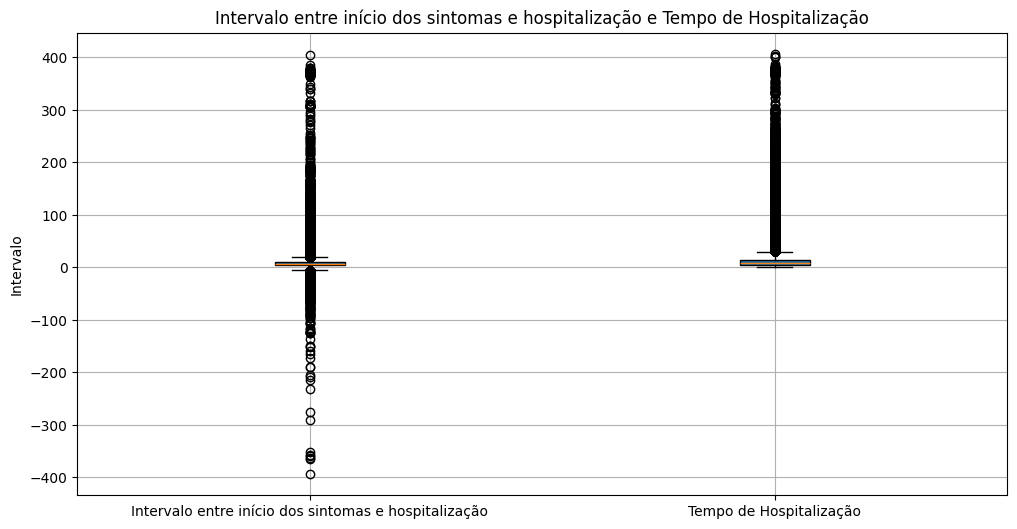

In [29]:
plt.figure(figsize=(12, 6))
plt.boxplot([df['Symptom_Hospitalization_Interval'].dropna(), df['Hospitalization_Interval'].dropna()], vert=True, patch_artist=True)
plt.xticks([1, 2], ['Intervalo entre início dos sintomas e hospitalização', 'Tempo de Hospitalização'])
plt.title('Intervalo entre início dos sintomas e hospitalização e Tempo de Hospitalização')
plt.ylabel('Intervalo')
plt.grid(True)
plt.show()

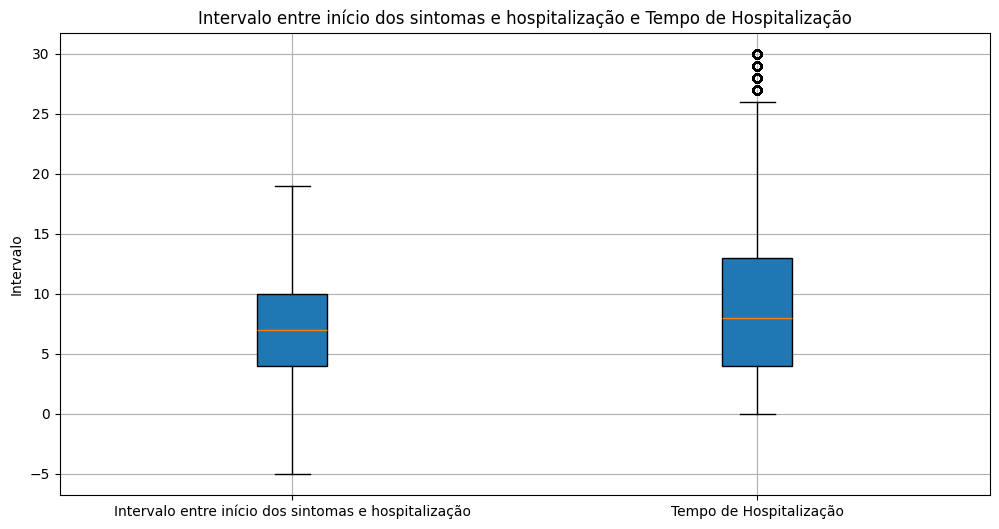

In [39]:
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

# Remover outliers das colunas
symptom_hospitalization_interval_filtered = remove_outliers(df['Symptom_Hospitalization_Interval'].dropna())
hospitalization_interval_filtered = remove_outliers(df['Hospitalization_Interval'].dropna())

# Criar um boxplot das colunas 'Symptom_Hospitalization_Interval' e 'Hospitalization_Interval' sem outliers
plt.figure(figsize=(12, 6))
plt.boxplot([symptom_hospitalization_interval_filtered, hospitalization_interval_filtered], vert=True, patch_artist=True)
plt.xticks([1, 2], ['Intervalo entre início dos sintomas e hospitalização', 'Tempo de Hospitalização'])
plt.title('Intervalo entre início dos sintomas e hospitalização e Tempo de Hospitalização')
plt.ylabel('Intervalo')
plt.grid(True)
plt.show()

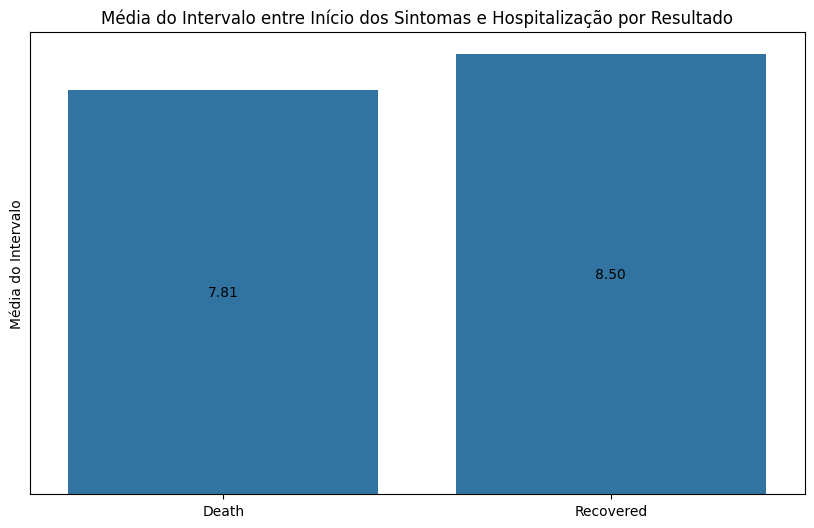

In [61]:
# Filtrar os valores positivos da coluna 'Symptom_Hospitalization_Interval'
df_filtered = df[df['Symptom_Hospitalization_Interval'] > 0]

# Calcular a média dos intervalos para cada grupo de outcome
mean_interval = df_filtered.groupby('Outcome values')['Symptom_Hospitalization_Interval'].mean()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=mean_interval.index, y=mean_interval.values)

# Adicionar os valores das médias dentro das barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center')

# Remover a escala do eixo y
ax.yaxis.set_ticks([])

# Adicionar título e rótulos dos eixos
ax.set_title('Média do Intervalo entre Início dos Sintomas e Hospitalização por Resultado')
ax.set_xlabel('')
ax.set_ylabel('Média do Intervalo')

# Mostrar o gráfico
plt.show()


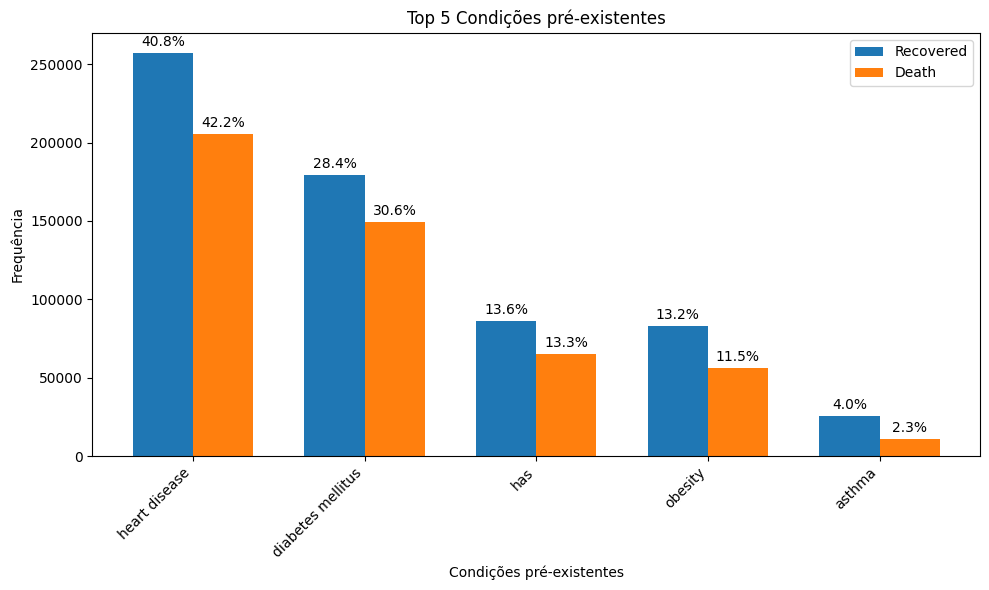

In [71]:
#hipotese 2
condition_columns = ['Condition1', 'Condition2', 'Condition3', 'Condition4', 'Condition5']

# Filtrar entradas vazias nas colunas de condições preexistentes
filtered_df = df.dropna(subset=condition_columns, how='all')  # Remove linhas onde todas as condições são vazias

# Contar as condições mais frequentes para 'Recovered'
recovered_conditions = filtered_df[filtered_df['Outcome values'] == 'Recovered'][condition_columns].stack().value_counts()
top_recovered_conditions = recovered_conditions.head(5)  # Pegar as 5 condições mais frequentes para 'Recovered'

# Contar as condições mais frequentes para 'Death'
death_conditions = filtered_df[filtered_df['Outcome values'] == 'Death'][condition_columns].stack().value_counts()
top_death_conditions = death_conditions.head(5)  # Pegar as 5 condições mais frequentes para 'Death'

# Preparar os dados para o gráfico de barras duplas
top_conditions = top_recovered_conditions.index.tolist()
recovered_counts = top_recovered_conditions.tolist()
death_counts = [death_conditions.get(cond, 0) for cond in top_conditions]  # Garantir que contamos mesmo se 0 ocorrencias

# Calcular as proporções em % para cada grupo
total_recovered = sum(recovered_counts)
total_death = sum(death_counts)

recovered_percentages = [count / total_recovered * 100 for count in recovered_counts]
death_percentages = [count / total_death * 100 for count in death_counts]

# Configurar o gráfico de barras duplas
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(top_conditions))

bar1 = ax.bar(index, recovered_counts, bar_width, label='Recovered')
bar2 = ax.bar([i + bar_width for i in index], death_counts, bar_width, label='Death')

ax.set_xlabel('Condições pré-existentes')
ax.set_ylabel('Frequência')
ax.set_title('Top 5 Condições pré-existentes')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(top_conditions, rotation=45, ha='right')
ax.legend()

# Adicionar rótulos nas barras com percentuais
def autolabel(bars, percentages):
    for bar, percent in zip(bars, percentages):
        height = bar.get_height()
        ax.annotate('{:.1f}%'.format(percent),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Deslocamento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1, recovered_percentages)
autolabel(bar2, death_percentages)

plt.tight_layout()
plt.show()
